In [20]:
from scipy.fftpack import fft, ifft, dct, idct
from scipy.ndimage import convolve1d
import np
import fourier_basis as ft
import numpy
import math
import random
import itertools
import matplotlib.pyplot as plt
import matplotlib
import time
%matplotlib inline
import seaborn as sns
sns.set_style('white')
import basis_pursuit as bp
def flatten(nested):
    return itertools.chain(*nested)
def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        print(method.__name__,te-ts)
        return result
    return timed
def threshold(val):
    return val if val>0.7 else 0
def hard_threshold(series):
    return [threshold(i) for i in series]

In [15]:
def sample(hz, secs, wavefreq):
    times = [i/hz for i in range(secs*hz)]
    signal = [math.exp(-5*t)*math.cos(2*math.pi*wavefreq*t)+random.gauss(0,0.15) for t in times]
    return np.Vector(*signal)
#signal = np.Vector(1,0,0,0,0).zero_mean_normalize()
signal = (0.2*sample(500, 1, 98.3)+sample(500,1,12.2)+0.75*sample(500,1,45)+0.3*sample(500,1,200.3)).zero_mean_normalize()
#3Hz wave sampled at 10Hz, one second duration
l1_spectrum = timeit(bp.sparseft)(signal)
reconstruct = bp.inverse_ft(l1_spectrum)
ff_spectrum = fft(signal)
r_fft = ifft(ff_spectrum)
#sns.tsplot(np.real(half_package(l1_ft)), color = 'b')

norm diff:  0.5869827792355464
converged 0.0013189315795898438
norm diff:  2.51238749956756e-15
converged 0.0012469291687011719
sparseft 1.365321159362793


/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


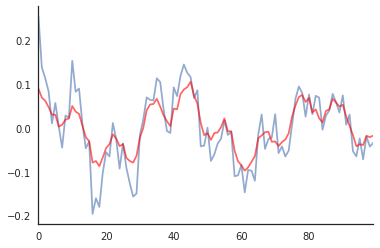

In [44]:
sns.tsplot(signal[0:100], alpha=0.6)
sns.tsplot(reconstruct[0:100], alpha = 0.6, color = 'r')
#sns.tsplot(numpy.real(r_fft)[50:150], alpha = 0.3)
sns.despine()

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


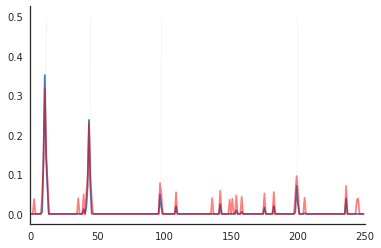

In [31]:
sns.tsplot(l1_spectrum[0::2])
sns.tsplot(1/20*(numpy.real(hard_threshold(ff_spectrum[1:251]))), alpha = 0.5, color = 'r')
sns.tsplot([0.5 if val in [98,12, 45,200] else 0 for val in range(251)], alpha = 0.4, linewidth = 0.1)
sns.despine()

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


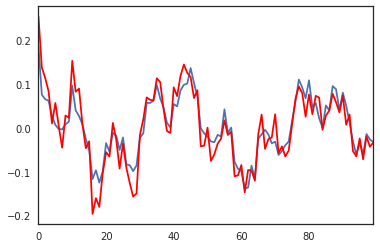

In [45]:
ht_ifft = ifft(hard_threshold(ff_spectrum))
sns.tsplot(numpy.real(ht_ifft)[0:100])
sns.tsplot(signal[0:100], color = 'r')

In [6]:
def c_ratio(spectrum):
    return len([i for i in spectrum if i])/len(spectrum)

In [23]:
c_ratio(l1_spectrum)

0.11823647294589178

In [19]:
c_ratio(ff_spectrum)

1.0

In [22]:
c_ratio(hard_threshold(ff_spectrum))

0.124

In [33]:
ri = numpy.random.choice(500,100, replace=False)

In [34]:
ri

array([ 27, 196, 336, 284, 176, 297, 384,  57, 118,  85, 104, 290, 307,
        75, 346, 189, 488, 127, 133, 491,  80, 413, 163, 333, 448, 455,
        99, 223, 489,  76, 191,  70, 214, 462, 394,  96, 267,  64, 146,
       311, 383,  25, 447, 451, 492,  71, 108,  59,  65,  40, 397, 499,
       432,  44, 326,  17,  20, 362, 124, 396, 441,  66, 148, 170, 210,
        58,  73, 458,  63, 199, 157, 256, 138, 112, 160, 480, 390, 406,
       440, 473,  81, 134, 271,  19, 457, 248, 156, 264, 251,  38,  93,
        13, 139, 415, 411, 280,  91, 281, 276, 334])